In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [218]:
y_train[1]

0

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

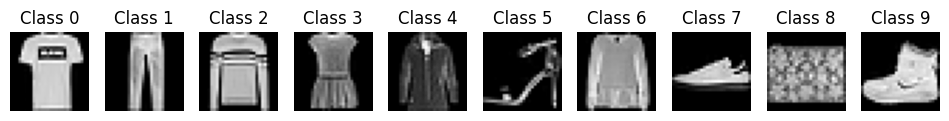

In [7]:
def find_one_image_per_class(X, y):
    unique_classes = np.unique(y)
    images_per_class = {}

    for cls in unique_classes:
        index = np.where(y == cls)[0][0]
        images_per_class[cls] = X[index]

    return images_per_class




images_per_class = find_one_image_per_class(X_train, y_train)


num_classes = len(images_per_class)
fig, axs = plt.subplots(1, num_classes, figsize=(12, 4))

for i, cls in enumerate(images_per_class.keys()):
    axs[i].imshow(images_per_class[cls], cmap='gray')
    axs[i].set_title(f"Class {cls}")
    axs[i].axis('off')

plt.show()

In [8]:
X_train = X_train/255
X_test = X_test/255

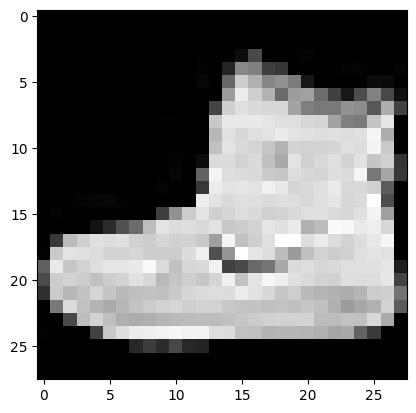

In [9]:
plt.imshow(X_train[0] , cmap="gray")

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

In [18]:
model = Sequential()

In [130]:
model2 = Sequential()

In [19]:
model.add(Conv2D(64 , kernel_size= (3,3) , padding = "same" , activation = "relu" , input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32 , kernel_size= (3,3) , padding = "same" , activation = "relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128 , activation = "relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64 , activation = "relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10  , activation = "softmax",kernel_regularizer=regularizers.l2(0.01)))

In [146]:
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = "softmax"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                      

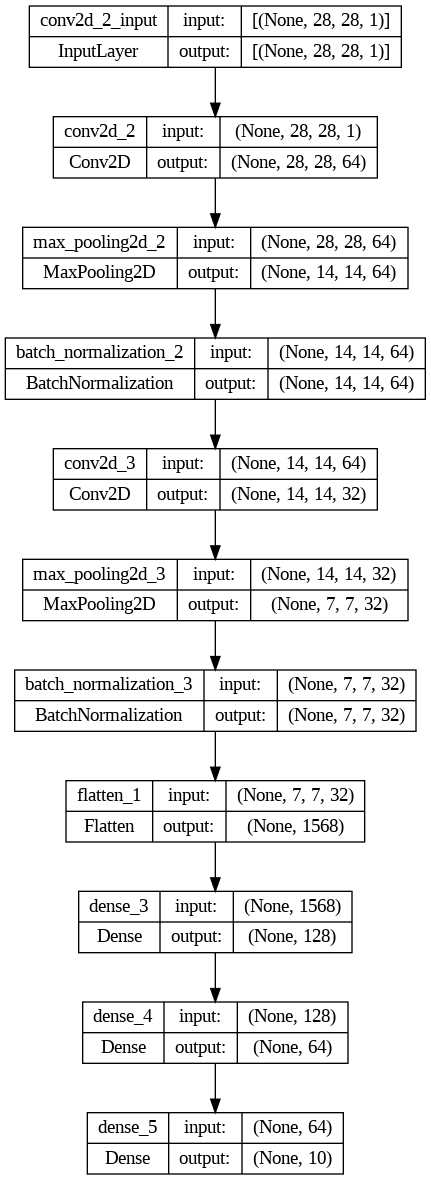

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

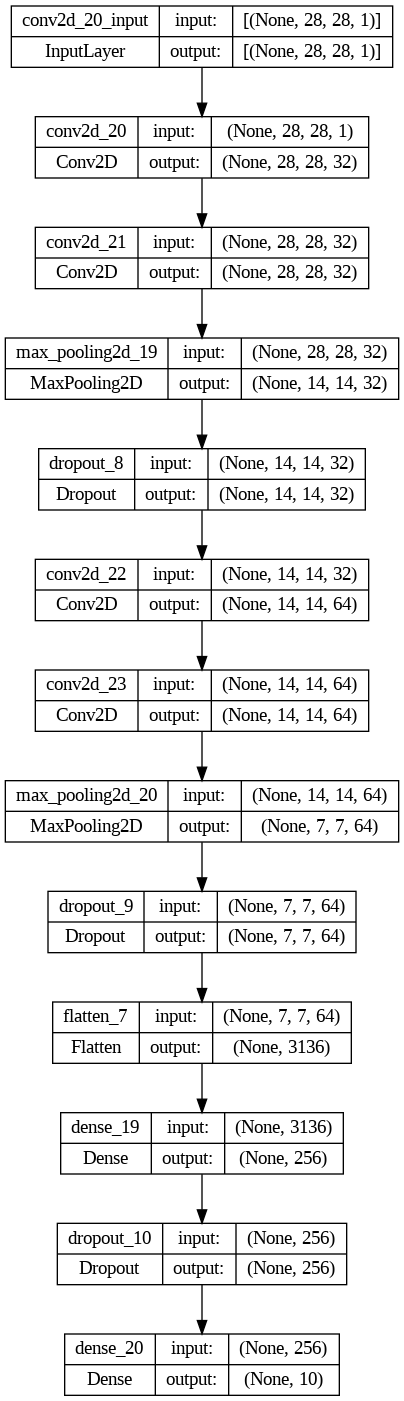

In [147]:
plot_model(model2, show_shapes=True, show_layer_names=True)

In [22]:
cb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [23]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [148]:
model2.compile(loss = "sparse_categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [149]:
history = model2.fit(X_train , y_train , validation_split=0.2 , verbose = True , callbacks = cb , epochs = 20)

Epoch 1/20
1500/1500 [==============================] - 12s 6ms/step - loss: 0.5061 - accuracy: 0.8152 - val_loss: 0.3213 - val_accuracy: 0.8802
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3378 - accuracy: 0.8745 - val_loss: 0.2684 - val_accuracy: 0.8979
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2935 - accuracy: 0.8882 - val_loss: 0.2521 - val_accuracy: 0.9033
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2666 - accuracy: 0.9007 - val_loss: 0.2422 - val_accuracy: 0.9093
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2503 - accuracy: 0.9079 - val_loss: 0.2273 - val_accuracy: 0.9142
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2316 - accuracy: 0.9149 - val_loss: 0.2241 - val_accuracy: 0.9143
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2221 - accuracy: 0.9161 - val_loss: 0.2127 - val_accurac

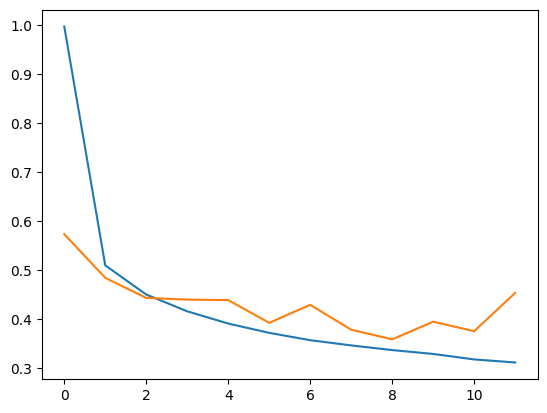

In [25]:
#first model

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

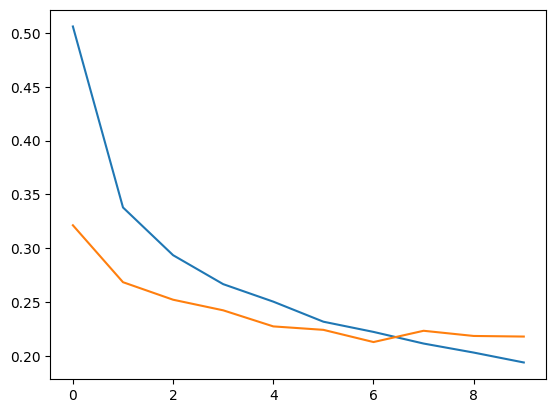

In [150]:
#second model

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

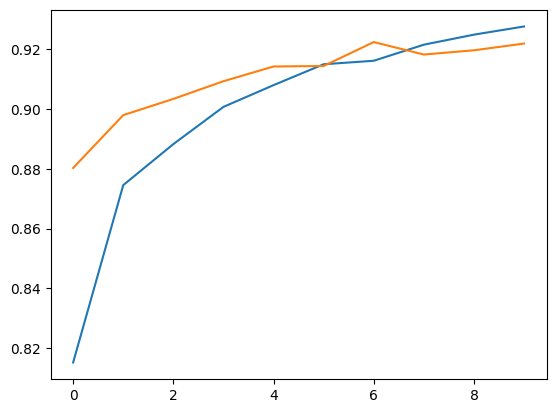

In [151]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [159]:
y_pred = model2.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [160]:
y_pred = np.argmax(y_pred , axis = 1)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_pred , y_test)

0.9203

1/1 [==============================] - 0s 30ms/step
T-shirt/top


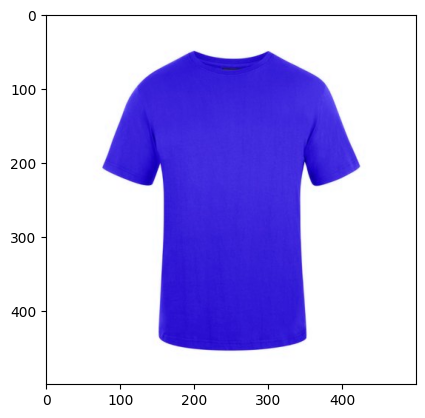

In [254]:
image = cv2.imread('/content/shirt.jpeg')
plt.imshow(image)
#change t0 gray
image = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
#resize and invert color
image = cv2.resize(image , (28,28))
image = image.astype('float32') / 255
image = 1 - image
#reshape to make the model predict
img = image.reshape(1,28,28,1)
#predict
ans = model2.predict(img)
ans = np.argmax(ans , axis = 1)


if ans == 0:
    print("T-shirt/top")
elif ans == 1:
    print("pant")
elif ans == 2:
    print("Pullover")
elif ans == 3:
    print("Dress")
elif ans == 4:
    print("Coat")
elif ans == 5:
    print("heels")
elif ans == 6:
    print("Sweater")
elif ans == 7:
    print("flat shoes")
elif ans == 8:
    print("purse")
else:
    print("sneakers")


